<a href="https://colab.research.google.com/github/anacasicande/Modelamiento/blob/main/Tarea_3_jacobo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Constantes de equilibrio K_ji por etapa y componente:
[[ 2.394   6.704   0.828   0.4036  0.3152]
 [ 2.6125  7.16    0.9     0.44    0.35  ]
 [ 2.844   7.634   0.988   0.4856  0.3932]
 [ 3.0885  8.126   1.092   0.5404  0.4448]
 [ 3.346   8.636   1.212   0.6044  0.5048]
 [ 3.6165  9.164   1.348   0.6776  0.5732]
 [ 3.9     9.71    1.5     0.76    0.65  ]
 [ 4.1965 10.274   1.668   0.8516  0.7352]
 [ 4.506  10.856   1.852   0.9524  0.8288]
 [ 4.8285 11.456   2.052   1.0624  0.9308]]
Valores de razones adsorcion para etapa y compuesto:
[[0.29836496 0.1065462  0.86266391 1.76978621 2.26613488]
 [0.2734108  0.09976057 0.79365079 1.62337662 2.04081633]
 [0.25115531 0.09356638 0.72296125 1.47093434 1.81659642]
 [0.23127269 0.08790127 0.6541078  1.32177223 1.60585817]
 [0.         0.         0.         0.         0.        ]
 [0.19750746 0.07794475 0.52988554 1.05414066 1.24613698]
 [0.18315018 0.07356187 0.47619048 0.93984962 1.0989011 ]
 [0.17020987 0.06952362 0.42822885 0.8387573  0.97155293

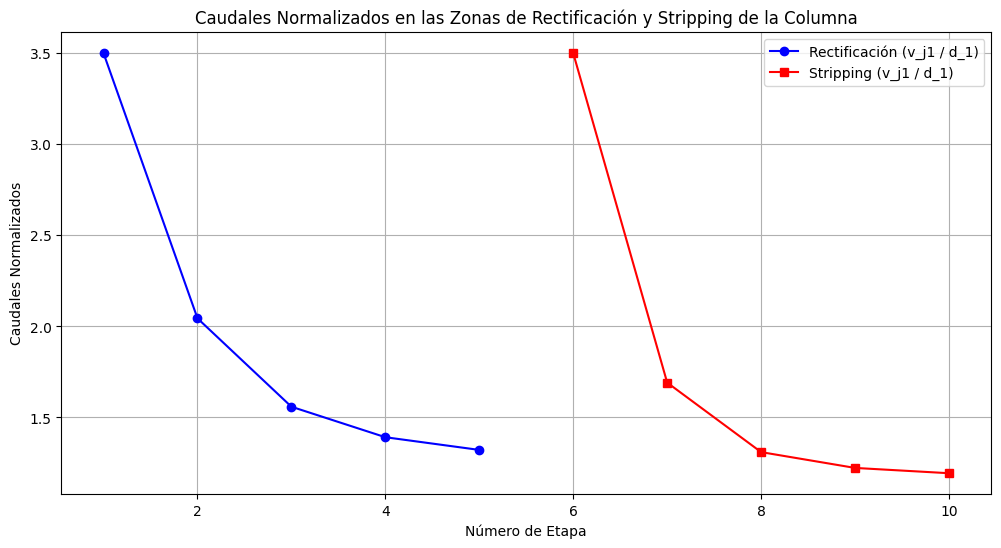

In [51]:
import numpy as np  # importo el modulo numpy
import matplotlib.pyplot as plt # importo el modulo matplotlib.pyplot


def calcular_constantes_equilibrio(temperaturas, alpha, beta, gamma): # Definir la función para calcular las constantes de equilibrio
    K = np.zeros((len(temperaturas), len(alpha)))  # Inicializa matriz K con ceros
    for j, T in enumerate(temperaturas):  # Itera sobre las temperaturas
        for i in range(len(alpha)):  # Itera sobre los parámetros alpha
            K[j, i] = alpha[i] + beta[i] * T + gamma[i] * T**2  # Calcula K_ji
    return K  # Devuelve la matriz de constantes de equilibrio

def resolver_sistema_lineal_rectificacion(num_etapas, A0, razones_adsorcion): # Define la solucion del sistema lineal para la rectificacion

    A = np.zeros((num_etapas, num_etapas))  # Inicializa la matriz A
    b = np.ones(num_etapas)  # Crea un vector b lleno de unos
    b[0] = A0 + 1  # Establece el valor del condensador en b

    for j in range(num_etapas):  # Itera sobre el número de etapas
        if j == 0: # condicion cuando es la etapa 0
            A[j, j] = 1  # Establece el condensador
        else: # si no es la etapa 0
            A[j, j] = 1  # Elemento diagonal
            A[j, j-1] = -razones_adsorcion[j-1]  # Elemento subdiagonal

    x = np.linalg.solve(A, b)  # Resuelve el sistema lineal
    return x  # Devuelve el vector de soluciones

def resolver_sistema_lineal_stripping(num_etapas, A0, razones_adsorcion): # Define una función para resolver el sistema lineal en stripping

    A = np.zeros((num_etapas, num_etapas))  # Inicializa la matriz A
    b = np.ones(num_etapas)  # Crea un vector b lleno de unos
    b[0] = A0 + 1  # Establece el valor del rehervidor en b

    for j in range(num_etapas):  # Itera sobre el número de etapas
        if j == 0: # condicion cuando es la etapa 0
            A[j, j] = 1  # Establece el rehervidor
        else: # si no es la etapa 0
            A[j, j] = 1  # Elemento diagonal
            A[j, j-1] = -razones_adsorcion[j-1]  # Elemento subdiagonal

    x = np.linalg.solve(A, b)  # Resuelve el sistema lineal
    return x  # Devuelve el vector de soluciones

def valores_a(k): # Define una función para calcular los valores de a
    L = 1250  # flujo de líquido en mol/h
    V = 1750  # flujo de vapor en mol/h
    a_values = np.zeros_like(k)  # Inicializa matriz a_values

    for i in range(k.shape[0]):  # Itera sobre las filas de k
        for j in range(k.shape[1]):  # Itera sobre las columnas de k
            if i == 4:  # Condición para la fila 4
                a_values[i, j] = 0  # Asigna 0 para la fila 4
            else: # si no es la fila 4
                a_values[i, j] = (L / (V * k[i, j]))  # Calcula valores de a
    return a_values  # Devuelve la matriz de valores de a

def separar_matriz(m): # Define una función para separar una matriz en dos partes
    matriz_1 = m[0:4, :]  # Selecciona las primeras 4 filas
    matriz_2 = m[5:11, :]  # Selecciona filas de 5 a 10
    return matriz_1, matriz_2  # Devuelve las dos matrices separadas

def separar_columnas(matriz): # Define una función para separar columnas de una matriz
    columnas = []  # Inicializa la lista para las columnas
    for j in range(matriz.shape[1]):  # Itera sobre las columnas
        columnas.append(matriz[:, j])  # Añade cada columna como array independiente
    return columnas  # Devuelve la lista de columnas

# Datos dados
F = 1000  # Caudal de alimentación en mol/h
z = [0.06, 0.17, 0.22, 0.20, 0.35]  # Fracciones molares de alimentación
relacion_reflujo = 2.5  # Relación de reflujo
temperaturas_F = [140, 150, 160, 170, 180, 190, 200, 210, 220, 230]  # Temperaturas en °F
temperaturas_K = [(T - 32) * 5/9 + 273.15 for T in temperaturas_F]  # Convierte a Kelvin

# Parámetros de las constantes de equilibrio
alpha = [0.70, 2.21, 1.50, 0.86, 0.71]  # Parámetros alpha
beta = [0.30e-2, 1.95e-2, -1.60e-2, -0.97e-2, -0.87e-2]  # Parámetros beta
gamma = [0.65e-4, 0.90e-4, 0.80e-4, 0.46e-4, 0.42e-4]  # Parámetros gamma

# Paso 1: Calcular las constantes de equilibrio
K = calcular_constantes_equilibrio(temperaturas_F, alpha, beta, gamma)  # Llama a la función para calcular K
print("Constantes de equilibrio K_ji por etapa y componente:")  # Imprime mensaje
print(K)  # Imprime la matriz K

# Paso 2: Calcular los valores de a
A = valores_a(K)  # Llama a la función para calcular a
print("Valores de razones adsorcion para etapa y compuesto:")  # Imprime mensaje
print(A)  # Imprime la matriz A

# Paso 3: Separar la matriz K en dos partes
matriz_1, matriz_2 = separar_matriz(A)  # Llama a la función para separar la matriz
print("\nRazones adsorcion rectificacion:")  # Imprime mensaje
print(matriz_1)  # Imprime la matriz de rectificación
print("\nRazones adsorcion stripping:")  # Imprime mensaje
print(matriz_2)  # Imprime la matriz de stripping

columnas = separar_columnas(matriz_1)  # Separa columnas de la matriz de rectificación
columnas_2 = separar_columnas(matriz_2)  # Separa columnas de la matriz de stripping

# Define los parámetros de las zonas de rectificación y stripping
num_etapas_rectificacion = 5  # Número de etapas en rectificación
num_etapas_stripping = 5  # Número de etapas en stripping
A0_rectificacion = 2.5  # Valor inicial para condensador
A0_stripping = 2.5  # Valor inicial para rehervidor
razones_adsorcion_rectificacion = [0.29836496, 0.2734108, 0.25115531, 0.23127269]  # Razones de adsorción en rectificación
razones_adsorcion_stripping = [0.19750746, 0.18315018, 0.17020987, 0.1585188, 0.14793118]  # Razones de adsorción en stripping

# Resolver el sistema lineal para la zona de rectificación
caudales_rectificacion = resolver_sistema_lineal_rectificacion(num_etapas_rectificacion, A0_rectificacion, razones_adsorcion_rectificacion) # resuelve el sistema lineal para llegar al caudal en la rectificacion

# Resolver el sistema lineal para la zona de stripping
caudales_stripping = resolver_sistema_lineal_stripping(num_etapas_stripping, A0_stripping, razones_adsorcion_stripping) # resuelve el sistema lineal para llegar al caudal en el stripping

# Mostrar los resultados numéricos
print("\nCaudales de rectificación (v_j1 / d_1) para cada etapa:")  # Imprime mensaje
for i, caudal in enumerate(caudales_rectificacion, start=1):  # Itera sobre los caudales de rectificación
    print(f"Etapa {i}: {caudal:.4f}")  # Imprime el caudal de cada etapa

print("\nCaudales de stripping (v_j1 / d_1) para cada etapa:")  # Imprime mensaje
for i, caudal in enumerate(caudales_stripping, start=1):  # Itera sobre los caudales de stripping
    print(f"Etapa {i + 5}: {caudal:.4f}")  # Imprime el caudal de cada etapa

def calculo_flujos_molares(x, fraccion): # Define una función para calcular flujos molares
    resultado = []  # Inicializa lista para resultados
    for valor in x:  # Itera sobre los valores de entrada
        flujo_molar = valor * 500 * fraccion  # Calcula el flujo molar
        resultado.append(flujo_molar)  # Añade el flujo a la lista
    return resultado  # Devuelve la lista de flujos molares

# Calcula los flujos molares
flujos_rectificacion = calculo_flujos_molares(caudales_rectificacion, 0.06)  # Llama a la función para rectificación
flujos_stripping = calculo_flujos_molares(caudales_stripping, 0.06)  # Llama a la función para stripping

# Mostrar los flujos molares
print("\nFlujos molares en la zona de rectificación componente 1:")  # Imprime mensaje
for i, flujo in enumerate(flujos_rectificacion, start=1):  # Itera sobre los flujos de rectificación
    print(f"Flujo etapa {i}: {flujo:.4f}")  # Imprime el flujo de cada etapa

print("\nFlujos molares en la zona de stripping componente 1:")  # Imprime mensaje
for i, flujo in enumerate(flujos_stripping, start=1):  # Itera sobre los flujos de stripping
    print(f"Flujo etapa {i + 5}: {flujo:.4f}")  # Imprime el flujo de cada etapa

def calculo_fraccion(x, V): # Define una función para calcular la fracción
    resultado = []  # Inicializa lista para resultados
    for i in x:  # Itera sobre los valores de entrada
        resultado.append(i / V)  # Calcula la fracción y la añade a la lista
    return np.array(resultado)  # Devuelve la lista como un array de NumPy
valores_de_y_1 = calculo_fraccion(flujos_rectificacion, 1750)  # Calcula fracciones para rectificación
valores_de_y_2 = calculo_fraccion(flujos_stripping, 1750)  # Calcula fracciones para stripping

# Mostrar los valores de y para cada componente
print("\nValores de y componente 1 rectificación:")  # Imprime mensaje
for i, y_1 in enumerate(valores_de_y_1, start=1):  # Itera sobre los valores de y en rectificación
    print(f"Etapa {i}: {y_1:.4f}")  # Imprime el valor de y de cada etapa

print("\nValores de y componente 1 stripping:")  # Imprime mensaje
for i, y_2 in enumerate(valores_de_y_2, start=1):  # Itera sobre los valores de y en stripping
    print(f"Etapa {i + num_etapas_rectificacion}: {y_2:.4f}")  # Imprime el valor de y de cada etapa

# Graficar los resultados de los caudales de stripping y rectificación
etapas_rectificacion = np.arange(1, num_etapas_rectificacion + 1)  # Crea un rango para las etapas de rectificación
etapas_stripping = np.arange(1, num_etapas_stripping + 1) + num_etapas_rectificacion  # Crea un rango para las etapas de stripping

plt.figure(figsize=(12, 6))  # Define el tamaño de la figura
plt.plot(etapas_rectificacion, caudales_rectificacion, marker='o', linestyle='-', color='b', label='Rectificación (v_j1 / d_1)')  # Grafica los caudales de rectificación
plt.plot(etapas_stripping, caudales_stripping, marker='s', linestyle='-', color='r', label='Stripping (v_j1 / d_1)')  # Grafica los caudales de stripping
plt.xlabel('Número de Etapa')  # Etiqueta del eje x
plt.ylabel('Caudales Normalizados')  # Etiqueta del eje y
plt.title('Caudales Normalizados en las Zonas de Rectificación y Stripping de la Columna')  # Título del gráfico
plt.grid(True)  # Activa la cuadrícula
plt.legend()  # Muestra la leyenda
plt.show()  # Muestra el gráfico


Caudales de rectificación (v_j2 / d_2) para cada etapa:
Etapa 1: 3.5000
Etapa 2: 1.3729
Etapa 3: 1.1370
Etapa 4: 1.1064
Etapa 5: 1.0973

Caudales de stripping (v_j2 / d_2) para cada etapa:
Etapa 6: 3.5000
Etapa 7: 1.2728
Etapa 8: 1.0936
Etapa 9: 1.0760
Etapa 10: 1.0708

Flujos molares etapa para el componente 2 rectificación:
Etapa 1: 297.5000
Etapa 2: 116.6975
Etapa 3: 96.6418
Etapa 4: 94.0424
Etapa 5: 93.2664

Flujos molares etapa para el componente 2 stripping:
Etapa 6: 297.5000
Etapa 7: 108.1886
Etapa 8: 92.9586
Etapa 9: 91.4628
Etapa 10: 91.0179

Valores de y componente 2 rectificación:
Etapa 1: 0.1700
Etapa 2: 0.0667
Etapa 3: 0.0552
Etapa 4: 0.0537
Etapa 5: 0.0533

Valores de y componente 2 stripping:
Etapa 6: 0.1700
Etapa 7: 0.0618
Etapa 8: 0.0531
Etapa 9: 0.0523
Etapa 10: 0.0520


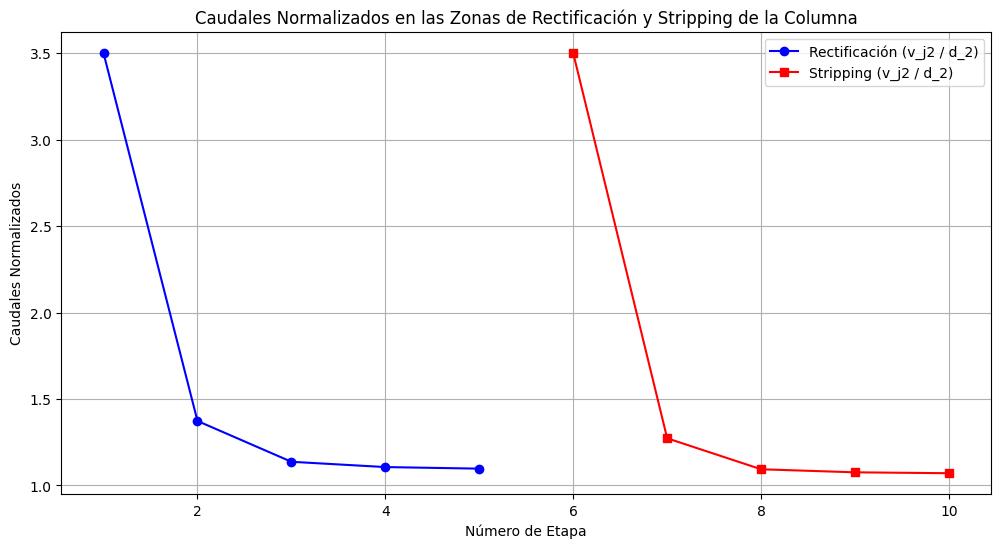

In [ ]:



razones_adsorcion_rectificacion = [0.1065462, 0.09976057, 0.09356638, 0.08790127] # valores de adsorcion componente 2 en la rectificacion
razones_adsorcion_stripping = [0.07794475, 0.07356187, 0.06952362, 0.0657964, 0.06235036] # valores de adsorcion componente 2 en el stripping
caudales_rectificacion = resolver_sistema_lineal_rectificacion(num_etapas_rectificacion, A0_rectificacion, razones_adsorcion_rectificacion) # Calcular los caudales para la zona de rectificación
caudales_stripping = resolver_sistema_lineal_stripping(num_etapas_stripping, A0_stripping, razones_adsorcion_stripping) # Calcular los caudales para la zona de stripping

# Mostrar los resultados de caudales de rectificación
print("\nCaudales de rectificación (v_j2 / d_2) para cada etapa:") # imprime mensaje
for i, caudal in enumerate(caudales_rectificacion, start=1): # enumera las etapas de los caudales en la rectificacion
    print(f"Etapa {i}: {caudal:.4f}") # imprime mensaje

# Mostrar los resultados de caudales de stripping
print("\nCaudales de stripping (v_j2 / d_2) para cada etapa:") # imprime mensaje
for i, caudal in enumerate(caudales_stripping, start=1): # enumera las etapas de los caudales en el stripping
    print(f"Etapa {i + 5}: {caudal:.4f}") # imprime mensaje


flujos_molares1 = calculo_flujos_molares(caudales_rectificacion, 0.17) # Calcular flujos molares para los componentes 2 en rectificación
flujos_molares2 = calculo_flujos_molares(caudales_stripping, 0.17) # Calcular flujos molares para los componentes 2 en stripping


print("\nFlujos molares etapa para el componente 2 rectificación:") # imprime mensaje
for i, flujos in enumerate(flujos_molares1, start=1): # enumera los flujos molares en la rectificacion
    print(f"Etapa {i}: {flujos:.4f}") # imprime mensaje

# Mostrar flujos molares para el componente 2 en stripping
print("\nFlujos molares etapa para el componente 2 stripping:") # imprime mensaje
for i, flujos in enumerate(flujos_molares2, start=1): # enumera los flujos molares en el stripping
    print(f"Etapa {i + 5}: {flujos:.4f}") # imprime mensaje


def calculo_fraccion(x, V): # Definir la función para calcular fracciones
    resultado = []  # Inicializa la lista de resultados
    for i in x:  # Itera sobre los valores de entrada
        resultado.append(i / V)  # Calcula la fracción y la añade a la lista
    return np.array(resultado)  # Devuelve la lista como un array de NumPy


valores_de_y_1 = calculo_fraccion(flujos_molares1, 1750) # Calcular las fracciones de los flujos molares en la rectificacion
valores_de_y_2 = calculo_fraccion(flujos_molares2, 1750) # Calcular las fracciones de los flujos molares en el stripping
print("\nValores de y componente 2 rectificación:") # imprime mensaje
for i, y_1 in enumerate(valores_de_y_1, start=1): # enumera los valores de y para el componente 2 en rectificación
    print(f"Etapa {i}: {y_1:.4f}") # imprime mensaje

# Mostrar valores de y para el componente 2 en stripping
print("\nValores de y componente 2 stripping:") # imprime mensaje
for i, y_2 in enumerate(valores_de_y_2, start=1): # enumera los valores de y para el componente 2 en stripping
    print(f"Etapa {i + 5}: {y_2:.4f}") # imprime mensaje
# Graficar los resultados de los caudales de stripping y rectificación
etapas_rectificacion = np.arange(1, num_etapas_rectificacion + 1)  # Etapas de rectificación
etapas_stripping = np.arange(1, num_etapas_stripping + 1)  # Etapas de stripping

plt.figure(figsize=(12, 6))  # Crear figura para la gráfica
plt.plot(etapas_rectificacion, caudales_rectificacion, marker='o', linestyle='-', color='b', label='Rectificación (v_j2 / d_2)') # grafica las etapas de rectificacion y los caudales de rectificacion
plt.plot(etapas_stripping + num_etapas_rectificacion, caudales_stripping, marker='s', linestyle='-', color='r', label='Stripping (v_j2 / d_2)') # grafica las etapas de rectificacion mas las de stripping y los caudales de stripping
plt.xlabel('Número de Etapa')  # Etiqueta para el eje X
plt.ylabel('Caudales Normalizados')  # Etiqueta para el eje Y
plt.title('Caudales Normalizados en las Zonas de Rectificación y Stripping de la Columna')  # Título de la gráfica
plt.grid(True)  # Activar la cuadrícula
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar la gráfica


Caudales de rectificación (v_j3 / d_3) para cada etapa:
Etapa 1: 3.5000
Etapa 2: 4.0193
Etapa 3: 4.1899
Etapa 4: 4.0292
Etapa 5: 3.6355

Caudales de stripping (v_j3 / d_3) para cada etapa:
Etapa 6: 3.5000
Etapa 7: 2.8546
Etapa 8: 2.3593
Etapa 9: 2.0103
Etapa 10: 1.7754

Flujos molares etapa para el componente 3 rectificación:
Etapa 1: 385.0000
Etapa 2: 442.1256
Etapa 3: 460.8933
Etapa 4: 443.2080
Etapa 5: 399.9058

Flujos molares etapa para el componente 3 stripping:
Etapa 6: 385.0000
Etapa 7: 314.0059
Etapa 8: 259.5266
Etapa 9: 221.1368
Etapa 10: 195.2888

Valores de y componente 3 rectificación:
Etapa 1: 0.2200
Etapa 2: 0.2526
Etapa 3: 0.2634
Etapa 4: 0.2533
Etapa 5: 0.2285

Valores de y componente 3 stripping:
Etapa 6: 0.2200
Etapa 7: 0.1794
Etapa 8: 0.1483
Etapa 9: 0.1264
Etapa 10: 0.1116


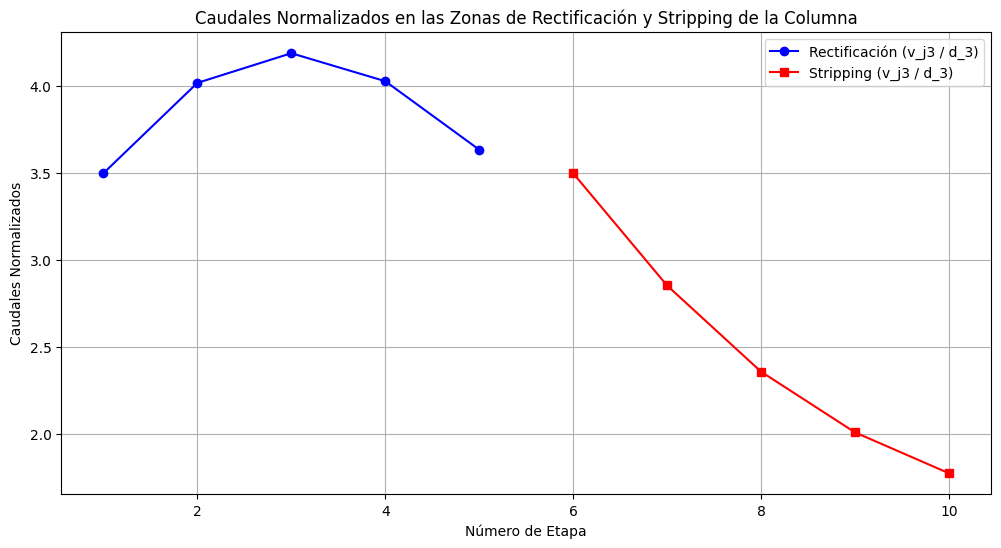

In [ ]:


razones_adsorcion_rectificacion = [0.86266391, 0.79365079, 0.72296125, 0.6541078] # valores de adsorcion componente 3 en la rectificacion
razones_adsorcion_stripping = [0.52988554, 0.47619048, 0.42822885, 0.38568343, 0.34809245] # valores de adsorcion componente 3 en la rectificacion


caudales_rectificacion = resolver_sistema_lineal_rectificacion(num_etapas_rectificacion, A0_rectificacion, razones_adsorcion_rectificacion) # Calcular los caudales para la zona de rectificación


caudales_stripping = resolver_sistema_lineal_stripping(num_etapas_stripping, A0_stripping, razones_adsorcion_stripping) # Calcular los caudales para la zona de stripping


print("\nCaudales de rectificación (v_j3 / d_3) para cada etapa:") # imprime mensaje
for i, caudal in enumerate(caudales_rectificacion, start=1): # enumera los resultados de caudales de rectificación
    print(f"Etapa {i}: {caudal:.4f}") # imprime mensaje

print("\nCaudales de stripping (v_j3 / d_3) para cada etapa:") # imprime mensaje
for i, caudal in enumerate(caudales_stripping, start=1): # enumera los resultados de caudales de stripping
    print(f"Etapa {i + 5}: {caudal:.4f}") # imprime mensaje


flujos_molares1 = calculo_flujos_molares(caudales_rectificacion, 0.22) # Calcular flujos molares para los componentes 3 en rectificación
flujos_molares2 = calculo_flujos_molares(caudales_stripping, 0.22) # Calcular flujos molares para los componentes 3 en stripping


print("\nFlujos molares etapa para el componente 3 rectificación:") # imprime mensaje
for i, flujos in enumerate(flujos_molares1, start=1): # enumerar los flujos molares para el componente 3 en rectificación
    print(f"Etapa {i}: {flujos:.4f}") # imprime mensaje


print("\nFlujos molares etapa para el componente 3 stripping:") # imprime mensaje
for i, flujos in enumerate(flujos_molares2, start=1): # enumera los flujos molares para el componente 3 en stripping
    print(f"Etapa {i + 5}: {flujos:.4f}") # imprime mensaje


def calculo_fraccion(x, V): # Definir la función para calcular fracciones
    resultado = []  # Inicializa la lista de resultados
    for i in x:  # Itera sobre los valores de entrada
        resultado.append(i / V)  # Calcula la fracción y la añade a la lista
    return np.array(resultado)  # Devuelve la lista como un array de NumPy


valores_de_y_1 = calculo_fraccion(flujos_molares1, 1750) # Calcular las fracciones de los flujos molares en la rectificacion
valores_de_y_2 = calculo_fraccion(flujos_molares2, 1750) # Calcular las fracciones de los flujos molares en el stripping

print("\nValores de y componente 3 rectificación:") # imprime mensaje
for i, y_1 in enumerate(valores_de_y_1, start=1): # enumera los valores de y para el componente 3 en rectificación
    print(f"Etapa {i}: {y_1:.4f}") # imprime mensaje


print("\nValores de y componente 3 stripping:") # imprime mensaje
for i, y_2 in enumerate(valores_de_y_2, start=1): # enumera los valores de y para el componente 3 en stripping
    print(f"Etapa {i + 5}: {y_2:.4f}") # imprime mensaje
# Graficar los resultados de los caudales de stripping y rectificación
etapas_rectificacion = np.arange(1, num_etapas_rectificacion + 1)  # Etapas de rectificación
etapas_stripping = np.arange(1, num_etapas_stripping + 1)  # Etapas de stripping

plt.figure(figsize=(12, 6))  # Crear figura para la gráfica
plt.plot(etapas_rectificacion, caudales_rectificacion, marker='o', linestyle='-', color='b', label='Rectificación (v_j3 / d_3)') # grafica las etapas de rectificacion y los caudales de rectificacion
plt.plot(etapas_stripping + num_etapas_rectificacion, caudales_stripping, marker='s', linestyle='-', color='r', label='Stripping (v_j3 / d_3)') # grafica las etapas de rectificacion mas stripping y los caudales de stripping
plt.xlabel('Número de Etapa')  # Etiqueta para el eje X
plt.ylabel('Caudales Normalizados')  # Etiqueta para el eje Y
plt.title('Caudales Normalizados en las Zonas de Rectificación y Stripping de la Columna')  # Título de la gráfica
plt.grid(True)  # Activar la cuadrícula
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar la gráfica


Caudales de rectificación (v_j4 / d_4) para cada etapa:
Etapa 1: 3.5000
Etapa 2: 7.1943
Etapa 3: 12.6790
Etapa 4: 19.6499
Etapa 5: 26.9728

Caudales de stripping (v_j4 / d_4) para cada etapa:
Etapa 6: 3.5000
Etapa 7: 4.6895
Etapa 8: 5.4074
Etapa 9: 5.5355
Etapa 10: 5.1516

Flujos molares etapa para el componente 4 rectificación:
Etapa 1: 350.0000
Etapa 2: 719.4252
Etapa 3: 1267.8980
Etapa 4: 1964.9947
Etapa 5: 2697.2754

Flujos molares etapa para el componente 4 stripping:
Etapa 6: 350.0000
Etapa 7: 468.9492
Etapa 8: 540.7418
Etapa 9: 553.5511
Etapa 10: 515.1550

Valores de y componente 4 rectificación:
Etapa 1: 0.2000
Etapa 2: 0.4111
Etapa 3: 0.7245
Etapa 4: 1.1229
Etapa 5: 1.5413

Valores de y componente 4 stripping:
Etapa 6: 0.2000
Etapa 7: 0.2680
Etapa 8: 0.3090
Etapa 9: 0.3163
Etapa 10: 0.2944


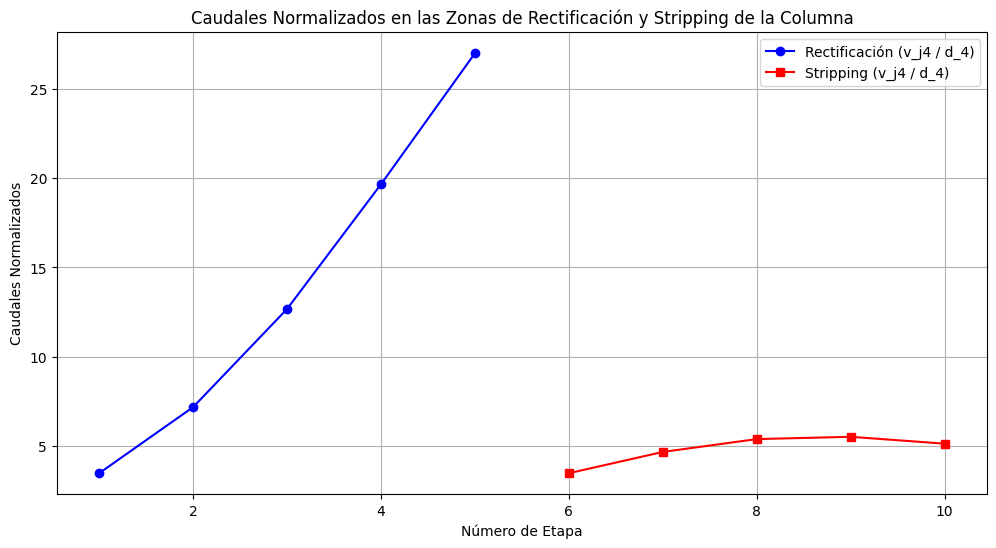

In [ ]:



razones_adsorcion_rectificacion = [1.76978621, 1.62337662, 1.47093434, 1.32177223] # Razones de adsorción para las etapas de rectificación
razones_adsorcion_stripping = [1.05414066, 0.93984962, 0.8387573, 0.749985, 0.67233219] # Razones de adsorción para las etapas de stripping


caudales_rectificacion = resolver_sistema_lineal_rectificacion(num_etapas_rectificacion, A0_rectificacion, razones_adsorcion_rectificacion) # Calcular los caudales para la zona de rectificación


caudales_stripping = resolver_sistema_lineal_stripping(num_etapas_stripping, A0_stripping, razones_adsorcion_stripping) # Calcular los caudales para la zona de stripping


print("\nCaudales de rectificación (v_j4 / d_4) para cada etapa:") # imprime mensaje
for i, caudal in enumerate(caudales_rectificacion, start=1): # enumera los resultados de caudales de rectificación
    print(f"Etapa {i}: {caudal:.4f}") # imprime mensaje


print("\nCaudales de stripping (v_j4 / d_4) para cada etapa:") # imprime mensaje
for i, caudal in enumerate(caudales_stripping, start=1): # enumera los resultados de caudales de stripping
    print(f"Etapa {i + 5}: {caudal:.4f}") # imprime mensaje


flujos_molares1 = calculo_flujos_molares(caudales_rectificacion, 0.20) # Calcular flujos molares para los componentes 4 en rectificación
flujos_molares2 = calculo_flujos_molares(caudales_stripping, 0.20) # Calcular flujos molares para los componentes 4 en stripping


print("\nFlujos molares etapa para el componente 4 rectificación:") # imprime mensaje
for i, flujos in enumerate(flujos_molares1, start=1): # enumera los flujos molares para el componente 4 en rectificación
    print(f"Etapa {i}: {flujos:.4f}") # imprime mensaje


print("\nFlujos molares etapa para el componente 4 stripping:") # imprime mensaje
for i, flujos in enumerate(flujos_molares2, start=1): # enumera los flujos molares para el componente 4 en stripping
    print(f"Etapa {i + 5}: {flujos:.4f}") # imprime mensaje


def calculo_fraccion(x, V): # Definir la función para calcular fracciones
    resultado = []  # Inicializa la lista de resultados
    for i in x:  # Itera sobre los valores de entrada
        resultado.append(i / V)  # Calcula la fracción y la añade a la lista
    return np.array(resultado)  # Devuelve la lista como un array de NumPy


valores_de_y_1 = calculo_fraccion(flujos_molares1, 1750) # Calcular las fracciones de los flujos molares en la rectificacion
valores_de_y_2 = calculo_fraccion(flujos_molares2, 1750) # Calcular las fracciones de los flujos molares en el stripping


print("\nValores de y componente 4 rectificación:") # imprime mensaje
for i, y_1 in enumerate(valores_de_y_1, start=1): # enumera los valores de y para el componente 4 en rectificación
    print(f"Etapa {i}: {y_1:.4f}") # imprime mensaje


print("\nValores de y componente 4 stripping:") # imprime mensaje
for i, y_2 in enumerate(valores_de_y_2, start=1): # enumera los valores de y para el componente 4 en stripping
    print(f"Etapa {i + 5}: {y_2:.4f}") # imprime mensaje
# Graficar los resultados de los caudales de stripping y rectificación
etapas_rectificacion = np.arange(1, num_etapas_rectificacion + 1)  # Etapas de rectificación
etapas_stripping = np.arange(1, num_etapas_stripping + 1)  # Etapas de stripping

plt.figure(figsize=(12, 6))  # Crear figura para la gráfica
plt.plot(etapas_rectificacion, caudales_rectificacion, marker='o', linestyle='-', color='b', label='Rectificación (v_j4 / d_4)') # grafica las etapas de rectificacion y los caudales de rectificacion
plt.plot(etapas_stripping + num_etapas_rectificacion, caudales_stripping, marker='s', linestyle='-', color='r', label='Stripping (v_j4 / d_4)') # grafica las etapas de rectificacion mas stripping y los caudales de stripping
plt.xlabel('Número de Etapa')  # Etiqueta para el eje X
plt.ylabel('Caudales Normalizados')  # Etiqueta para el eje Y
plt.title('Caudales Normalizados en las Zonas de Rectificación y Stripping de la Columna')  # Título de la gráfica
plt.grid(True)  # Activar la cuadrícula
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar la gráfica


Caudales de rectificación (v_j5 / d_5) para cada etapa:
Etapa 1: 3.5000
Etapa 2: 8.9315
Etapa 3: 19.2275
Etapa 4: 35.9286
Etapa 5: 58.6962

Caudales de stripping (v_j5 / d_5) para cada etapa:
Etapa 6: 3.5000
Etapa 7: 5.3615
Etapa 8: 6.8917
Etapa 9: 7.6957
Etapa 10: 7.6324

Flujos molares etapa para el componente 5 rectificación:
Etapa 1: 612.5000
Etapa 2: 1563.0076
Etapa 3: 3364.8115
Etapa 4: 6287.5045
Etapa 5: 10271.8404

Flujos molares etapa para el componente 5 stripping:
Etapa 6: 612.5000
Etapa 7: 938.2589
Etapa 8: 1206.0537
Etapa 9: 1346.7450
Etapa 10: 1335.6669

Valores de y componente 5 rectificación:
Etapa 1: 0.3500
Etapa 2: 0.8931
Etapa 3: 1.9227
Etapa 4: 3.5929
Etapa 5: 5.8696

Valores de y componente 5 stripping:
Etapa 6: 0.3500
Etapa 7: 0.5361
Etapa 8: 0.6892
Etapa 9: 0.7696
Etapa 10: 0.7632


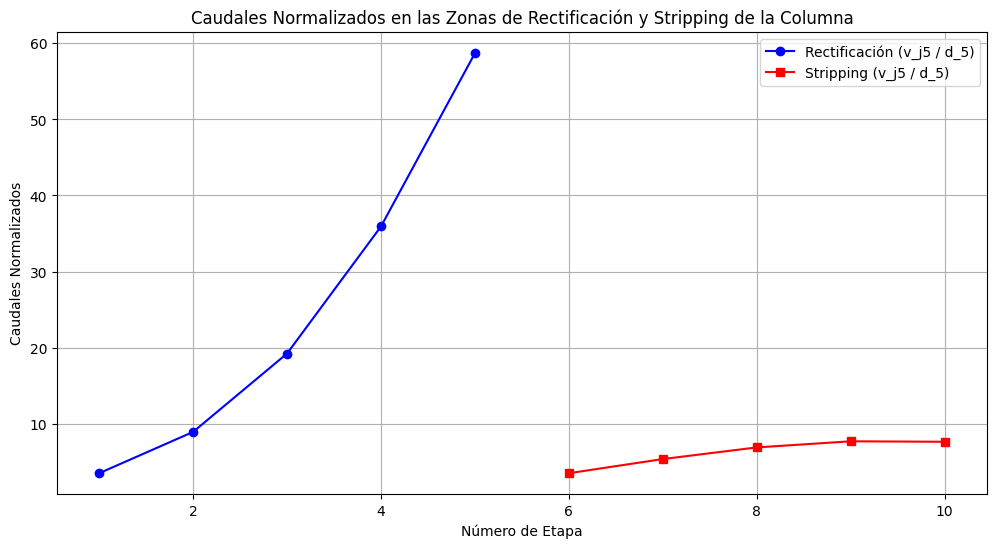

In [50]:


razones_adsorcion_rectificacion = [2.26613488, 2.04081633, 1.81659642, 1.60585817] # Razones de adsorción para las etapas de rectificación
razones_adsorcion_stripping = [1.24613698, 1.0989011, 0.97155293, 0.86183122, 0.76738904] # Razones de adsorción para las etapas de stripping


caudales_rectificacion = resolver_sistema_lineal_rectificacion(num_etapas_rectificacion, A0_rectificacion, razones_adsorcion_rectificacion) # Calcular los caudales para la zona de rectificación


caudales_stripping = resolver_sistema_lineal_stripping(num_etapas_stripping, A0_stripping, razones_adsorcion_stripping) # Calcular los caudales para la zona de stripping


print("\nCaudales de rectificación (v_j5 / d_5) para cada etapa:") # imprime mensaje
for i, caudal in enumerate(caudales_rectificacion, start=1): # enumera los resultados de caudales de rectificación
    print(f"Etapa {i}: {caudal:.4f}") # imprime mensaje


print("\nCaudales de stripping (v_j5 / d_5) para cada etapa:") # imprime mensaje
for i, caudal in enumerate(caudales_stripping, start=1): # enumera los resultados de caudales de stripping
    print(f"Etapa {i + 5}: {caudal:.4f}") # imprime mensaje



flujos_molares1 = calculo_flujos_molares(caudales_rectificacion, 0.35) # Calcular flujos molares para los componentes 5 en rectificación
flujos_molares2 = calculo_flujos_molares(caudales_stripping, 0.35) # Calcular flujos molares para los componentes 5 en stripping


print("\nFlujos molares etapa para el componente 5 rectificación:") # imprime mensaje
for i, flujos in enumerate(flujos_molares1, start=1): # enumera los flujos molares para el componente 5 en rectificación
    print(f"Etapa {i}: {flujos:.4f}") # imprime mensaje


print("\nFlujos molares etapa para el componente 5 stripping:") # imprime mensaje
for i, flujos in enumerate(flujos_molares2, start=1): # enumera los flujos molares para el componente 5 en stripping
    print(f"Etapa {i + 5}: {flujos:.4f}") # imprime mensaje


def calculo_fraccion(x, V): # Definir la función para calcular fracciones
    resultado = []  # Inicializa la lista de resultados
    for i in x:  # Itera sobre los valores de entrada
        resultado.append(i / V)  # Calcula la fracción y la añade a la lista
    return np.array(resultado)  # Devuelve la lista como un array de NumPy


valores_de_y_1 = calculo_fraccion(flujos_molares1, 1750) # Calcular las fracciones de los flujos molares de la rectificacion
valores_de_y_2 = calculo_fraccion(flujos_molares2, 1750) # Calcular las fracciones de los flujos molares del stripping


print("\nValores de y componente 5 rectificación:") # imprime mensaje
for i, y_1 in enumerate(valores_de_y_1, start=1): # enumera los valores de y para el componente 5 en rectificación
    print(f"Etapa {i}: {y_1:.4f}") # imprime mensaje


print("\nValores de y componente 5 stripping:") # imprime mensaje
for i, y_2 in enumerate(valores_de_y_2, start=1): # enumera los valores de y para el componente 5 en stripping
    print(f"Etapa {i + 5}: {y_2:.4f}") # imprime mensaje
# Graficar los resultados de los caudales de stripping y rectificación
etapas_rectificacion = np.arange(1, num_etapas_rectificacion + 1)  # Etapas de rectificación
etapas_stripping = np.arange(1, num_etapas_stripping + 1)  # Etapas de stripping

plt.figure(figsize=(12, 6))  # Crear figura para la gráfica
plt.plot(etapas_rectificacion, caudales_rectificacion, marker='o', linestyle='-', color='b', label='Rectificación (v_j5 / d_5)') # grafica las etapas de rectificacion y los caudales de rectificacion
plt.plot(etapas_stripping + num_etapas_rectificacion, caudales_stripping, marker='s', linestyle='-', color='r', label='Stripping (v_j5 / d_5)') # grafica las etapas de rectificacion mas stripping y los caudales de stripping
plt.xlabel('Número de Etapa')  # Etiqueta para el eje X
plt.ylabel('Caudales Normalizados')  # Etiqueta para el eje Y
plt.title('Caudales Normalizados en las Zonas de Rectificación y Stripping de la Columna')  # Título de la gráfica
plt.grid(True)  # Activar la cuadrícula
plt.legend()  # Mostrar leyenda
plt.show()  # Mostrar la gráfica